In [1]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.datasets import load_wine

In [3]:
data = load_wine()

In [4]:
import pandas as pd
df = pd.DataFrame(data=data.data,columns=data.feature_names)

In [5]:
df["target"]=data.target

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.20)

In [10]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [11]:
rf_classifier.predict(X_test)

array([2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0,
       1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2])

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
accuracy_score(y_test,rf_classifier.predict(X_test))

1.0

In [14]:
conf = confusion_matrix(y_test,rf_classifier.predict(X_test))

<Axes: >

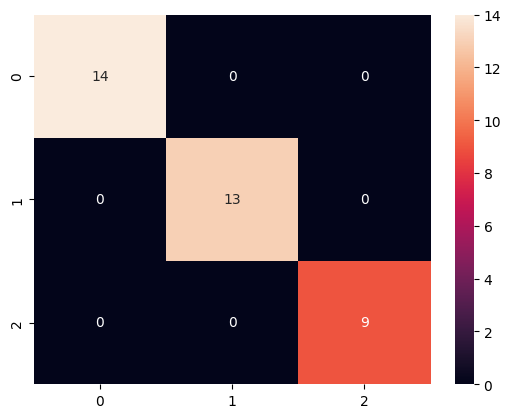

In [15]:
import seaborn as sns
sns.heatmap(conf,annot=True)

In [16]:
(rf_classifier.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
cls = RandomForestClassifier()
params = {
    'n_estimators' : [10,50,100,120,150],
    'criterion' : ["gini", "entropy", "log_loss"],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf':[1,2,5,8],
    'min_samples_split':[1,2,4,5]
}
gridsearch_rf = GridSearchCV(estimator=cls,param_grid=params,cv=5)
gridsearch_rf.fit(X_train,y_train)

C:\Users\sandeep.nataraja\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1800 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sandeep.nataraja\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sandeep.nataraja\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\sandeep.nataraja\AppData\Local\Programs\Pyt

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 8],
                         'min_samples_split': [1, 2, 4, 5],
                         'n_estimators': [10, 50, 100, 120, 150]})

In [19]:
gridsearch_rf.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [20]:
best_rf_cls = gridsearch_rf.best_estimator_

In [21]:
best_rf_cls.predict(X_test)

array([2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0,
       1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2])

In [22]:
accuracy_score(y_test,best_rf_cls.predict(X_test))

1.0

<Axes: >

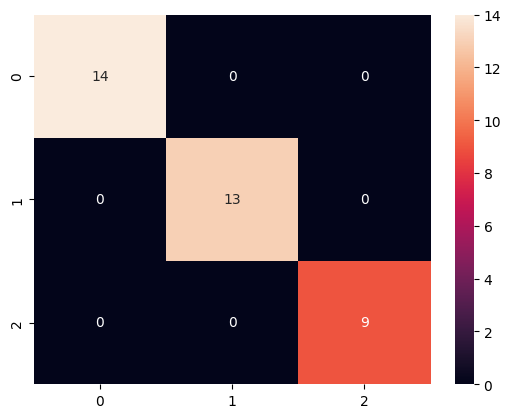

In [23]:
conf = confusion_matrix(y_test,best_rf_cls.predict(X_test))
sns.heatmap(conf,annot=True)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,best_rf_cls.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

